In [77]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Activation ,Dense ,Dropout , Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [78]:
batch_size = 128
nb_classes = 10
nb_epochs = 15
img_rows,img_col = 28,28
nb_filters = 32
nb_pool = 2
nb_conv = 3


In [79]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [123]:
X_train.shape

(60000, 28, 28, 1)

In [81]:
y_train.shape

(60000,)

In [105]:
X_train = X_train.reshape(X_train.shape[0] , img_rows ,img_col ,1)
X_test = X_test.reshape(X_test.shape[0] , img_rows ,img_col,1)

In [83]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [84]:
X_train /= 255
X_test /= 255

In [85]:
print(X_train.shape , X_test.shape)

(60000, 1, 28, 28) (10000, 1, 28, 28)


In [86]:
y_train = np_utils.to_categorical(y_train ,nb_classes)
y_test = np_utils.to_categorical(y_test ,nb_classes)

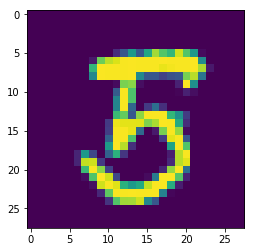

In [87]:
i = 4600
plt.imshow(X_train[i ,0] , interpolation='nearest')

In [88]:
print('label' ,y_train[4600 ,:])

label [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## model

In [97]:
model = Sequential()

In [98]:
model.add(Convolution2D(32 ,(3,3) ,input_shape =(img_col ,img_rows,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [99]:
model.add(Flatten())
model.add(Dense(128))

In [101]:
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))

In [103]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [118]:
model.fit(X_train ,y_train ,batch_size = batch_size ,epochs = nb_epochs,verbose = 1 , validation_data=(X_test,y_test))
model.fit(X_train ,y_train ,batch_size = batch_size ,epochs = nb_epochs,verbose = 1 , validation_split = 0.2 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0894 - acc: 0.9737 - val_loss: 0.0396 - val_acc: 0.9866
Epoch 2/15
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0689 - acc: 0.9794 - val_loss: 0.0351 - val_acc: 0.9881
Epoch 3/15
60000/60000 [==============================] - 210s 3ms/step - loss: 0.0583 - acc: 0.9825 - val_loss: 0.0342 - val_acc: 0.9891
Epoch 4/15
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0300 - val_acc: 0.9898
Epoch 5/15
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0459 - acc: 0.9857 - val_loss: 0.0279 - val_acc: 0.9900
Epoch 6/15
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0412 - acc: 0.9873 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 7/15
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0279 - 

TypeError: Unrecognized keyword arguments: {'show_accuracy': True}

In [121]:
score = model.evaluate(X_test,y_test,verbose = 0)
print('test_score' , score[0])
print('test_score' , score[1])
print(model.predict_classes(X_test[1:5]))
print(y_test[1:5])

test_score 0.025286793108575057
test_score 0.9929
[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
__________

In [126]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 28, 28, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_31',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu',
   'name': 'activation_13',
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_

In [127]:
model.layers[0].get_weights()

[array([[[[-0.21899521,  0.18920955,  0.24761179,  0.03470551,
           -0.22882004,  0.06892455, -0.04462238,  0.27603906,
            0.23980361,  0.15194032,  0.22549354, -0.131482  ,
           -0.0274996 ,  0.1787243 ,  0.28629467,  0.10594008,
           -0.22884281, -0.33275035,  0.04885638, -0.33938256,
            0.16188398, -0.15091413,  0.05446226, -0.05894794,
            0.00449469, -0.08648102,  0.35727143,  0.1316511 ,
            0.30504605, -0.09182224, -0.2965341 , -0.07159112]],
 
         [[-0.34204683,  0.03513836,  0.24072783, -0.10687273,
           -0.2768028 ,  0.3337129 , -0.3922533 , -0.0917398 ,
            0.18381982, -0.13720183,  0.0981345 , -0.03538546,
           -0.19099511,  0.07816358,  0.19711278,  0.03702513,
            0.04281265, -0.0971755 ,  0.08289573, -0.18298985,
            0.0822572 ,  0.20498429, -0.1150997 ,  0.16171472,
            0.19479795,  0.10830338, -0.0506357 , -0.19486155,
            0.2822808 ,  0.05373726, -0.26611516, -

In [ ]:


import dhash
from PIL import Image

image = Image.open('C://Users//DU357159//Pictures//Audii.png')
row, col = dhash.dhash_row_col(image)
hash1 = dhash.format_hex(row, col)

image = Image.open('C://Users//DU357159//Pictures//car.jpg')
row, col = dhash.dhash_row_col(image)
hash2 = dhash.format_hex(row, col)

def hamming_distance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))
 
if __name__=="__main__":
    print(hamming_distance(hash1, hash2))


In [164]:
import pytesser

ModuleNotFoundError: No module named 'pytesser'